In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msn
import dexplot as dxp

In [2]:
import numpy as np
from scipy.stats import spearmanr

In [3]:

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb

In [4]:
train=pd.read_csv("training_set_VU_DM.csv")
#test=pd.read_csv("test_set_VU_DM.csv")


In [5]:
to_drop= ['comp1_rate',
'comp1_inv',
'comp1_rate_percent_diff',
'comp2_rate',
'comp2_inv',
'comp2_rate_percent_diff',
'comp3_rate',
'comp3_inv',
'comp3_rate_percent_diff',
'comp4_rate',
'comp4_inv',
'comp4_rate_percent_diff',
'comp5_rate',
'comp5_inv',
'comp5_rate_percent_diff',
'comp6_rate',
'comp6_inv',
'comp6_rate_percent_diff',
'comp7_rate',
'comp7_inv',
'comp7_rate_percent_diff',
'comp8_rate',
'comp8_inv',
'comp8_rate_percent_diff'

]

#train['outcome'] = pd.Series(train['booking_bool']> 0, 500 + train['position'] , train['click_bool']> 0, 100 +train['position'] , 0 + train['position'] )

conditions = [
    (train['booking_bool']> 0),
    (train['click_bool']> 0)
]

#choices = [500+(40 - train['position']) ,100+(40 - train['position'])]
#train['outcome'] = np.select(conditions, choices, default=(40 - train['position'])

choices = [2 ,1]
train['outcome'] = np.select(conditions, choices, default=0)

train_reduced  = train.drop(to_drop,  axis=1).sample(frac=0.2, replace=True, random_state=1)
#test_reduced  = test.iloc[: , :N].sample(frac=0.33, replace=True, random_state=1)

In [6]:
# conditions = [
#     (train['booking_bool']> 0),
#     (train['click_bool']> 0)
# ]

# choices = [500+train['position'],100+train['position'], train['position']]
# train['outcome'] = np.select(conditions, choices, default=train['position'])

In [7]:
train_reduced.isnull().mean() * 100

srch_id                         0.000000
date_time                       0.000000
site_id                         0.000000
visitor_location_country_id     0.000000
visitor_hist_starrating        94.913525
visitor_hist_adr_usd           94.889726
prop_country_id                 0.000000
prop_id                         0.000000
prop_starrating                 0.000000
prop_review_score               0.145008
prop_brand_bool                 0.000000
prop_location_score1            0.000000
prop_location_score2           21.970133
prop_log_historical_price       0.000000
position                        0.000000
price_usd                       0.000000
promotion_flag                  0.000000
srch_destination_id             0.000000
srch_length_of_stay             0.000000
srch_booking_window             0.000000
srch_adults_count               0.000000
srch_children_count             0.000000
srch_room_count                 0.000000
srch_saturday_night_bool        0.000000
srch_query_affin

<AxesSubplot:>

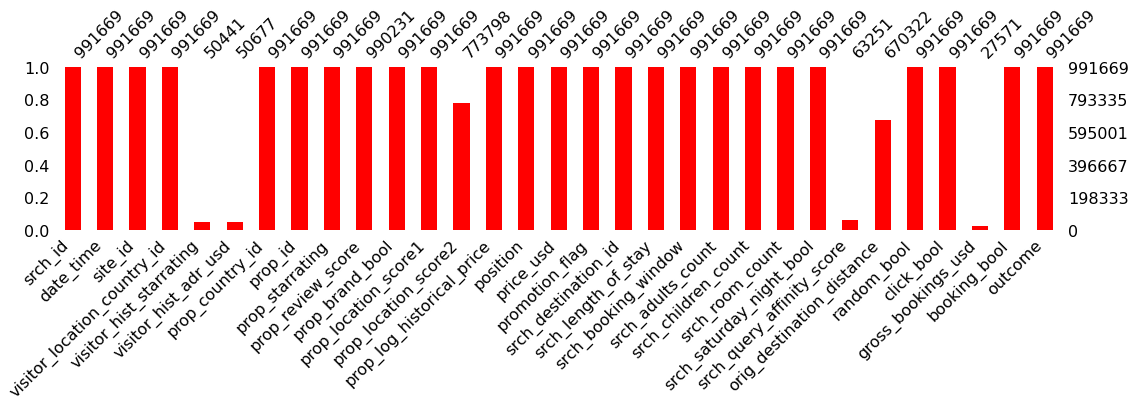

In [8]:
msn.bar(train_reduced,figsize=(18,3), color='red')

<AxesSubplot:>

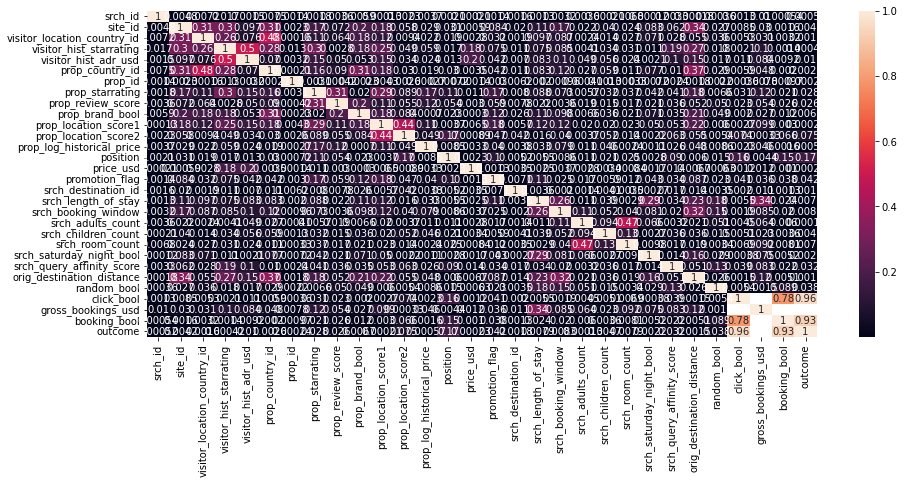

In [9]:
plt.figure(figsize=(15, 6))
sns.heatmap(train_reduced.corr().abs(),  annot=True)

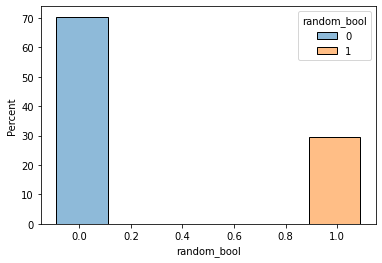

In [10]:
#ax = sns.histplot(x = train_reduced['random_bool'], hue=train_reduced['random_bool'], multiple="dodge", 
train_reduced = train_reduced.reset_index()
ax = sns.histplot(x = train_reduced['random_bool'], hue=train_reduced['random_bool'] ,
                  stat = 'percent', shrink =10, common_norm=True)

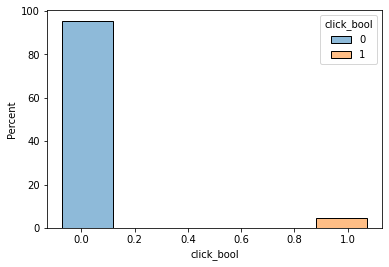

In [11]:
#ax = sns.histplot(x = train_reduced['random_bool'], hue=train_reduced['random_bool'], multiple="dodge", 
#train_reduced = train_reduced.reset_index()
ax = sns.histplot(x = train_reduced['click_bool'], hue=train_reduced['click_bool'] ,
                  stat = 'percent', shrink =4,common_norm=True)

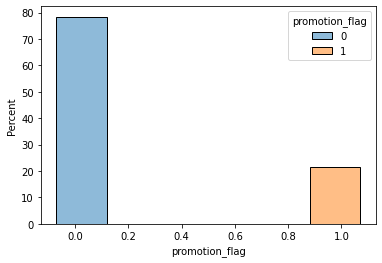

In [12]:
#ax = sns.histplot(x = train_reduced['random_bool'], hue=train_reduced['random_bool'], multiple="dodge", 
#train_reduced = train_reduced.reset_index()
ax = sns.histplot(x = train_reduced['promotion_flag'], hue=train_reduced['promotion_flag'] ,
                  stat = 'percent', shrink =4,common_norm=True)

In [13]:
# train_reduced['bought_flag'] = np.where(train_reduced['gross_bookings_usd']> 0, 1, 0)

# ax = sns.histplot(x = train_reduced['bought_flag'], hue=train_reduced['bought_flag'] ,
#                   stat = 'percent', shrink =4,common_norm=True)


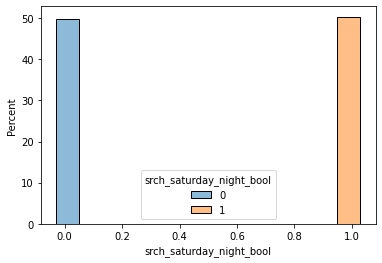

In [14]:


ax = sns.histplot(x = train_reduced['srch_saturday_night_bool'], hue=train_reduced['srch_saturday_night_bool'] ,
                  stat = 'percent', shrink =4,common_norm=True)


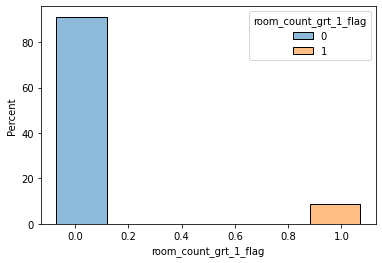

In [15]:
train_reduced['room_count_grt_1_flag'] = np.where(train_reduced['srch_room_count']> 1, 1, 0)

ax = sns.histplot(x = train_reduced['room_count_grt_1_flag'], hue=train_reduced['room_count_grt_1_flag'] ,
                  stat = 'percent', shrink =4,common_norm=True)

In [16]:
# df = train_reduced.loc[(train_reduced['gross_bookings_usd'] >= 0) & (train_reduced['gross_bookings_usd'] <= 1000)]
# sns.kdeplot(df['gross_bookings_usd'])
# plt.show()

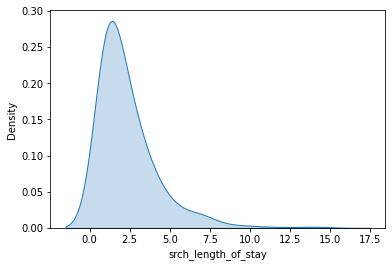

In [17]:
df = train_reduced.loc[(train_reduced['srch_length_of_stay'] >= 0) & (train_reduced['srch_length_of_stay'] <= 15)]
sns.kdeplot(df['srch_length_of_stay'], shade=True, bw_adjust=7)
plt.show()

In [18]:
train_reduced = train_reduced.loc[(train_reduced['random_bool'] == 0)]

In [36]:
to_drop = ['index','srch_id','site_id', 'date_time', 'visitor_location_country_id', 'prop_country_id', 'prop_id', 'prop_brand_bool', 'orig_destination_distance', 'click_bool', 'room_count_grt_1_flag', 'random_bool', 'booking_bool', 'srch_destination_id', 'position', 'prop_location_score2'
          ,'gross_bookings_usd'] 

train1 = train_reduced.drop(to_drop,  axis=1)

<AxesSubplot:>

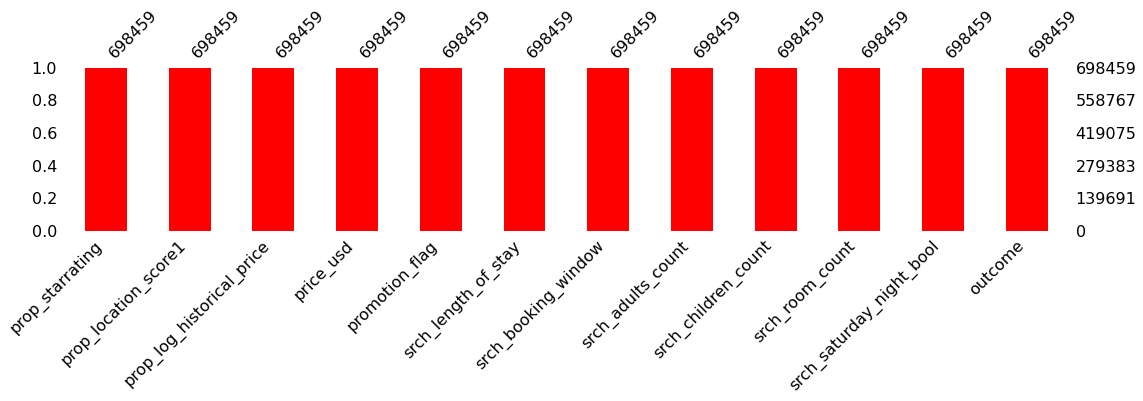

In [37]:
train1=train1.dropna(axis=1,how="any")
msn.bar(train1,figsize=(18,3), color='red')

In [38]:
train1.reset_index()
X = train1.iloc[:, :-1].values
y = train1.iloc[:, -1].values

In [39]:
train1.head(20)



,prop_starrating,prop_location_score1,prop_log_historical_price,price_usd,promotion_flag,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,outcome
0,2,1.61,4.37,55.00,0,1,5,2,2,1,1,0
1,3,4.04,4.76,143.40,1,3,34,5,0,2,0,0
2,4,2.08,5.30,105.00,0,3,6,3,0,2,1,0
5,3,3.47,5.15,294.56,0,10,194,5,0,3,0,0
6,4,0.69,4.82,99.74,1,1,27,4,0,2,1,0
7,3,2.20,4.53,91.00,0,2,4,1,0,1,0,0
8,3,4.58,5.39,182.00,0,3,29,2,0,1,1,0
9,3,2.20,4.99,100.00,0,1,2,1,1,2,1,0
11,5,6.10,5.93,309.23,0,3,56,2,0,1,1,0
12,5,4.80,0.00,108.00,1,1,16,1,0,1,1,0


In [40]:
models_list=[
    LogisticRegression(),
  #  Lasso(),
   # RandomForestClassifier(criterion='entropy', min_samples_leaf=60,
             #          min_samples_split=4, random_state=16),
    #GradientBoostingClassifier(),
    lgb.LGBMClassifier(),
   # LinearSVC(random_state=42, C=0.01),
    #xgb.XGBRegressor(objective="reg:linear", random_state=42)   
  #  xgb.XGBClassifier(objective="binary:logistic", random_state=0, eval_metric="auc", n_estimators=100, max_depth=6,learning_rate=0.1), 
 #   xgb.XGBClassifier(objective="binary:logistic", random_state=0, eval_metric="auc", n_estimators=100, max_depth=6,learning_rate=0.05), #better. 
  #  xgb.XGBClassifier(objective="binary:logistic", random_state=0, eval_metric="auc", n_estimators=100, max_depth=6,learning_rate=0.01), 
    #  "multi:softprob"
]

In [41]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [42]:
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
import warnings
warnings.filterwarnings('ignore')

l=[]
for model in models_list:
    #clf=clf_models(model)
    print(model)
    fit_model=model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    print("model score: %.3f" % score)
    l.append([model,'clf', score, X_test, y_test])
    #print(clf)
    #scores = -1 * cross_val_score(clf, X, y,cv=5,scoring='neg_mean_absolute_error')
    #print("MAE scores:\n", scores.mean(), scores.sum(), scores.min())
    
#print(l[3][4])
#print(l[2][3])
#print(l[2][0])

LogisticRegression()
model score: 0.957
LGBMClassifier()
model score: 0.957


In [43]:
y_pred=l[1][0].predict(X_test)

print(y_pred)

y_pred[:5]

[0 0 0 ... 0 0 0]


array([0, 0, 0, 0, 0])

In [44]:
predictors = ['prop_starrating', 'prop_location_score1','prop_log_historical_price','price_usd','promotion_flag','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_saturday_night_bool']

In [45]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), l[1][0].feature_importances_), predictors), reverse=True))

Features sorted by their score:
[(1909, 'price_usd'), (1664, 'prop_location_score1'), (1594, 'srch_booking_window'), (1588, 'prop_log_historical_price'), (549, 'srch_length_of_stay'), (450, 'prop_starrating'), (393, 'srch_adults_count'), (325, 'srch_children_count'), (190, 'srch_room_count'), (175, 'srch_saturday_night_bool'), (163, 'promotion_flag')]


In [47]:
from sklearn.inspection import permutation_importance
import time

start_time = time.time()
result = permutation_importance(
    l[1][0], X_test, y_test, n_repeats=5, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=predictors)

Elapsed time to compute the importances: 66.159 seconds


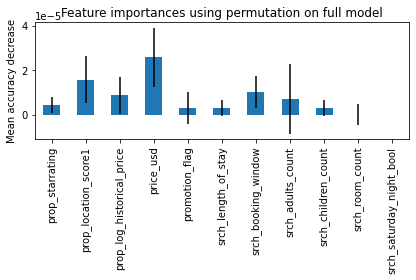

In [49]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [50]:
print(y_test)

[0 0 2 ... 0 0 0]


In [51]:
result = pd.DataFrame(y_test, columns=['actual'])
predicted= pd.DataFrame(y_pred, columns=['predicted'])

df = pd.DataFrame(X_test)



In [52]:
df['result'] = result
df['perdicted'] = predicted

In [53]:
df.to_csv('results.csv') 